### About Aerofit ###

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


#### Business Problem ####

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

#### Dataset ####

Product Purchased:	KP281, KP481, or KP781
Age:	In years
Gender:	Male/Female
Education:	In years
MaritalStatus:	Single or partnered
Usage:	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in $)
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles:	The average number of miles the customer expects to walk/run each week

#### Product Portfolio: ####

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [1]:
# import required modules
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
current_palette = sns.color_palette('colorblind')

In [2]:
# read data
aerofit_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [3]:
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Checking the dimensions of the dataset
print("Rows : {} ,Columns : {}".format(aerofit_df.shape[0],aerofit_df.shape[1]))

Rows : 180 ,Columns : 9


In [5]:
aerofit_df.info() #Display Details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### The dataset doesn't have any null values!

In [6]:
aerofit_df['Fitness'] = aerofit_df['Fitness'].apply(str) #Fitness is ordinal, so can be converted to categorical

In [7]:
aerofit_df.info() #Display changed Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 12.8+ KB


In [8]:
aerofit_df.describe() #Statistical Summary

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


#### 1.Standard Deviation is very high for Income and Miles, which could indicate the prescence of outliers
#### 2.Majority of the surveyed individuals lie in the age group of < 33, "Young adults"
#### 3. On an average, the surveyed individuals would use the Treadmill for little over 3 days a week
#### 4. Most of the surveyed individuals have about 16 years of education

## Univariate Analysis

In [9]:
for col in aerofit_df.select_dtypes(include=['object']).columns: #Filtering out non-numeric columns
    print("Marginal Probability for {}".format(col))
    print(round(aerofit_df[col].value_counts(normalize=True)*100,2)) #Displaying frequency distribution of categorical Variables
    print("----------------------------")

Marginal Probability for Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64
----------------------------
Marginal Probability for Gender
Male      57.78
Female    42.22
Name: Gender, dtype: float64
----------------------------
Marginal Probability for MaritalStatus
Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64
----------------------------
Marginal Probability for Fitness
3    53.89
5    17.22
2    14.44
4    13.33
1     1.11
Name: Fitness, dtype: float64
----------------------------


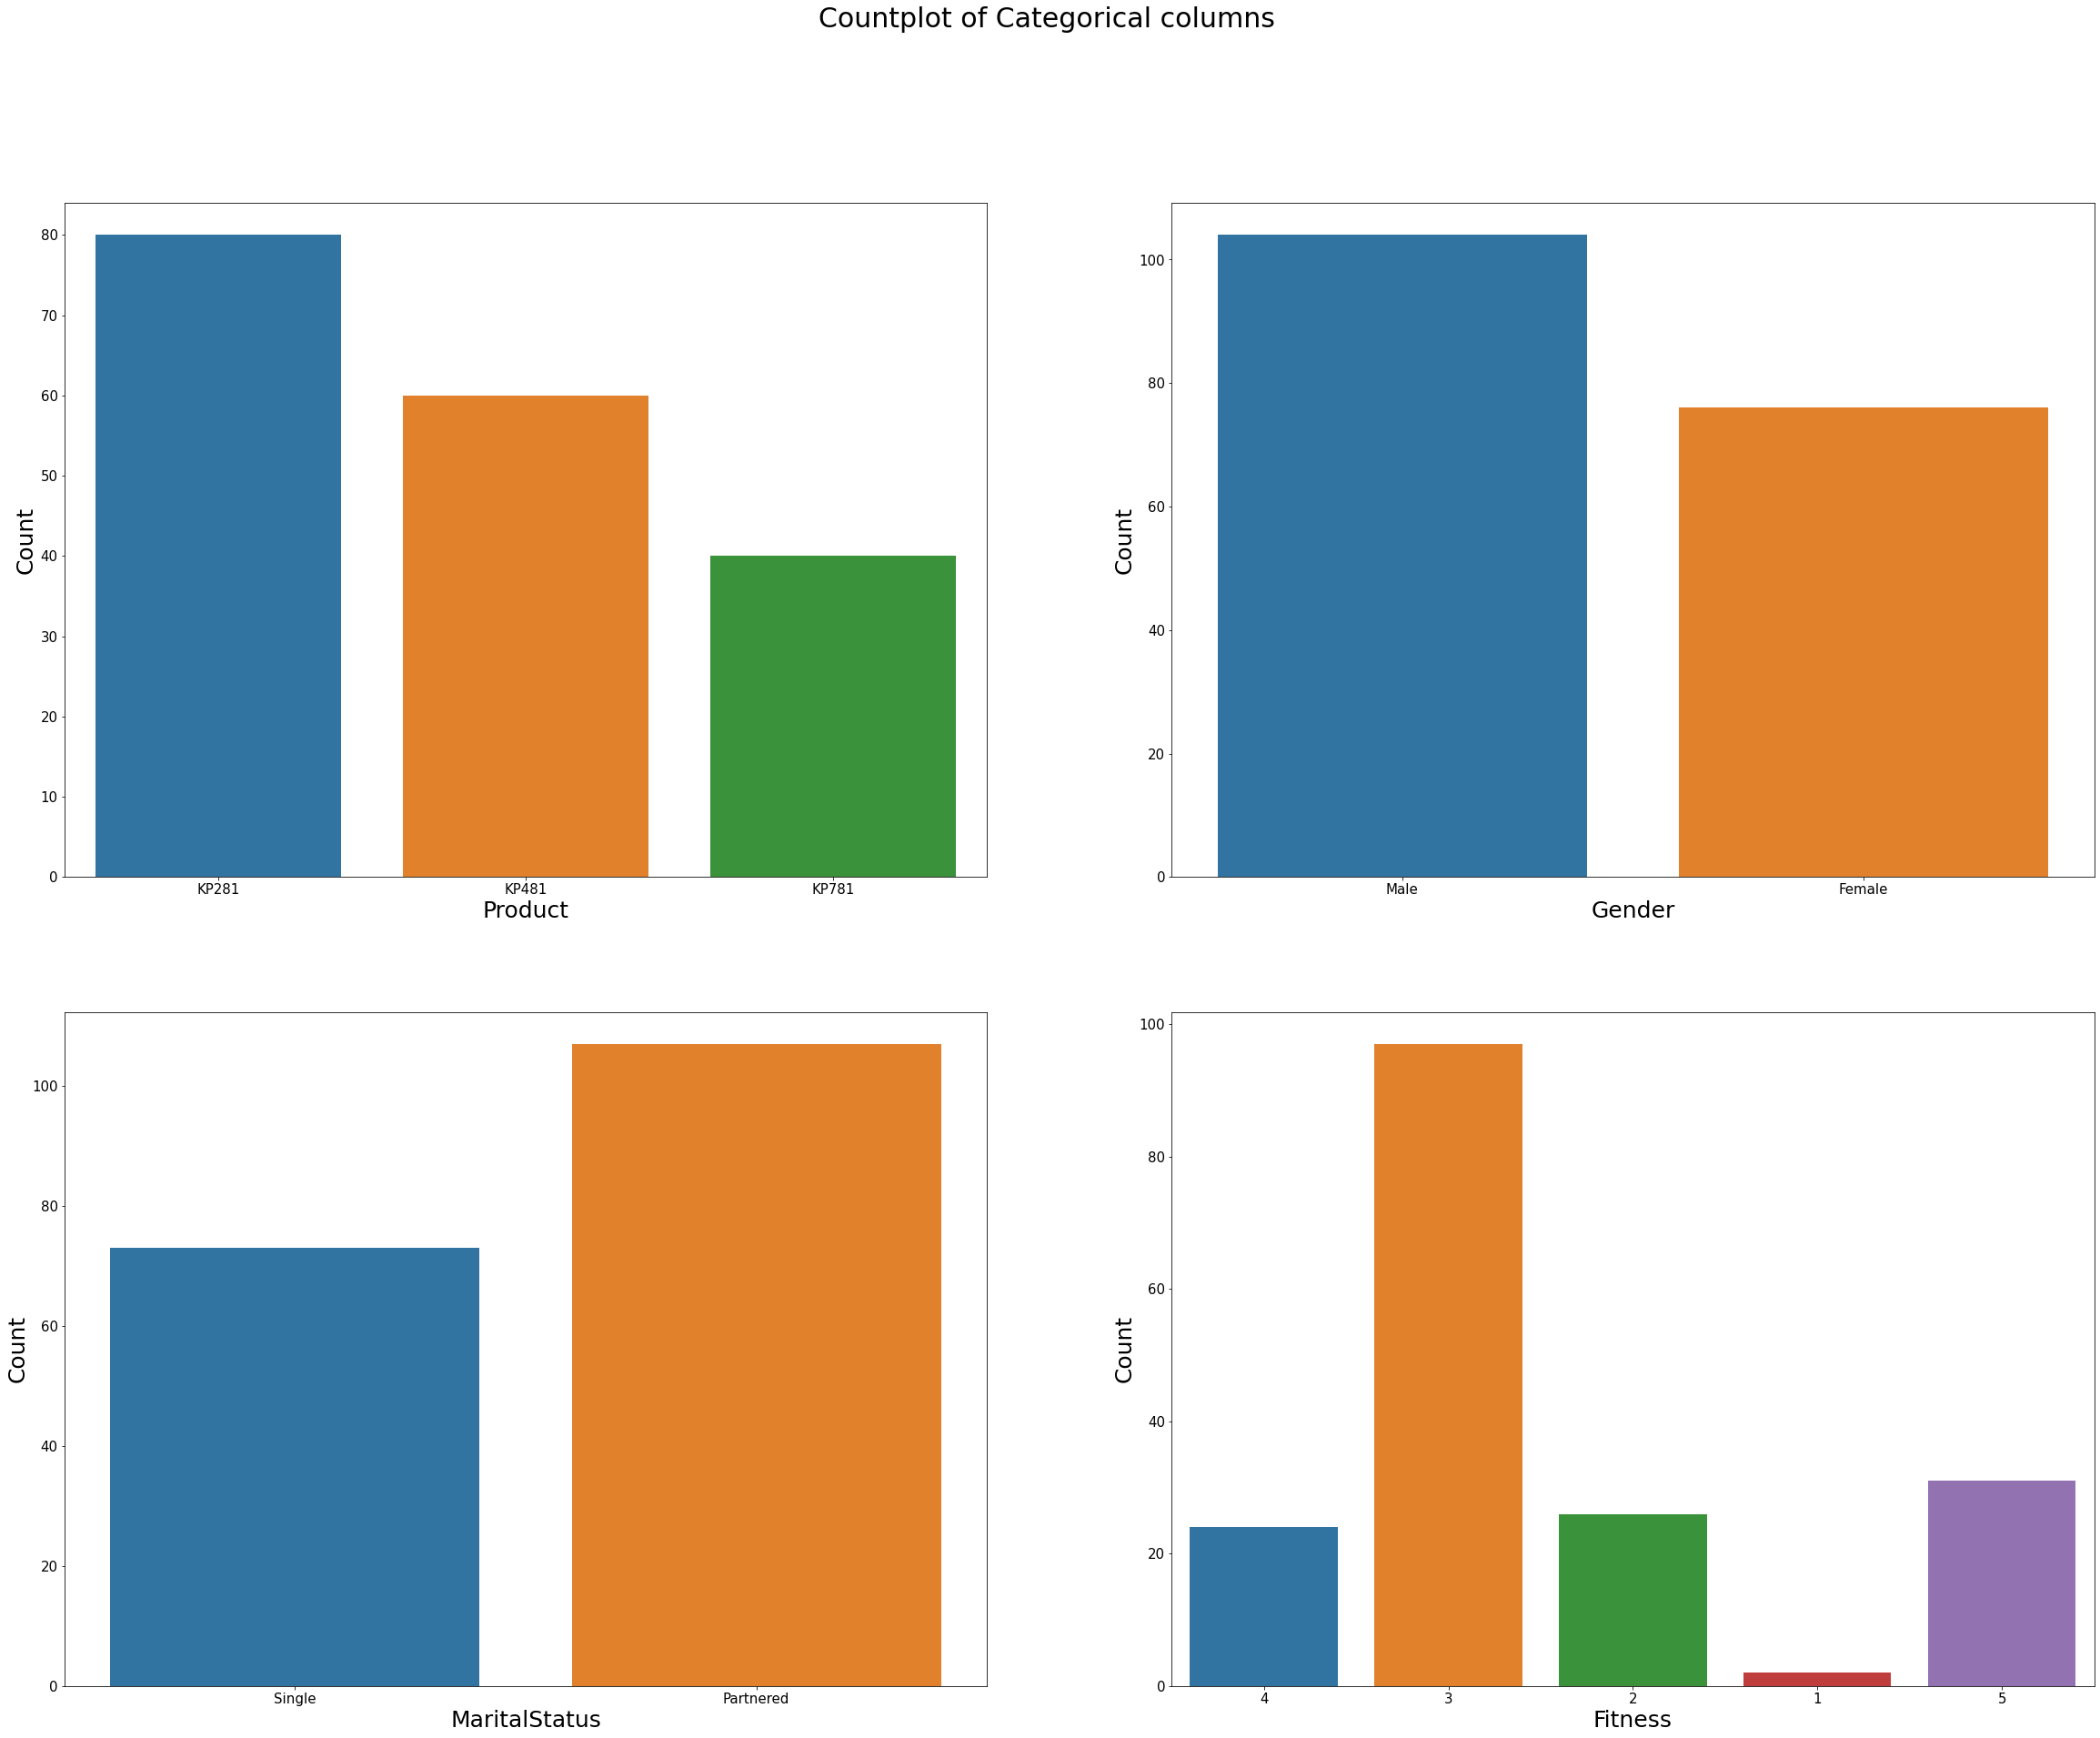

In [10]:
cat_columns = len(aerofit_df.select_dtypes(include=['object']).columns) #Filter out categorical columns
plt.rcParams['figure.figsize'] = (40, 30)
fig, axs = plt.subplots(int(round(cat_columns/2,0)), 2) # Create subplots

for i,col in enumerate(aerofit_df.select_dtypes(include=['object']).columns): #Iterate through each categorical column
    sns.countplot(data=aerofit_df, x=col, ax=axs[i//2,i%2])
    axs[i//2,i%2].set_xlabel(col,fontsize=25)
    axs[i//2,i%2].set_ylabel("Count",fontsize=25)
    axs[i//2,i%2].tick_params(labelsize=15)

fig.suptitle('Countplot of Categorical columns', fontsize=30)
plt.show()


#### 1. Most preferred treadmill type is KP281, almost 44%, which makes sense as it is the cheapest
#### 2. Though there isn't any major difference between the distribution of Gender or Marital Status, Males and Partnered individuals take a bigger share
#### 3. Most people rated themshelves 3 on scale of 5, indicating that they are serious buyers.

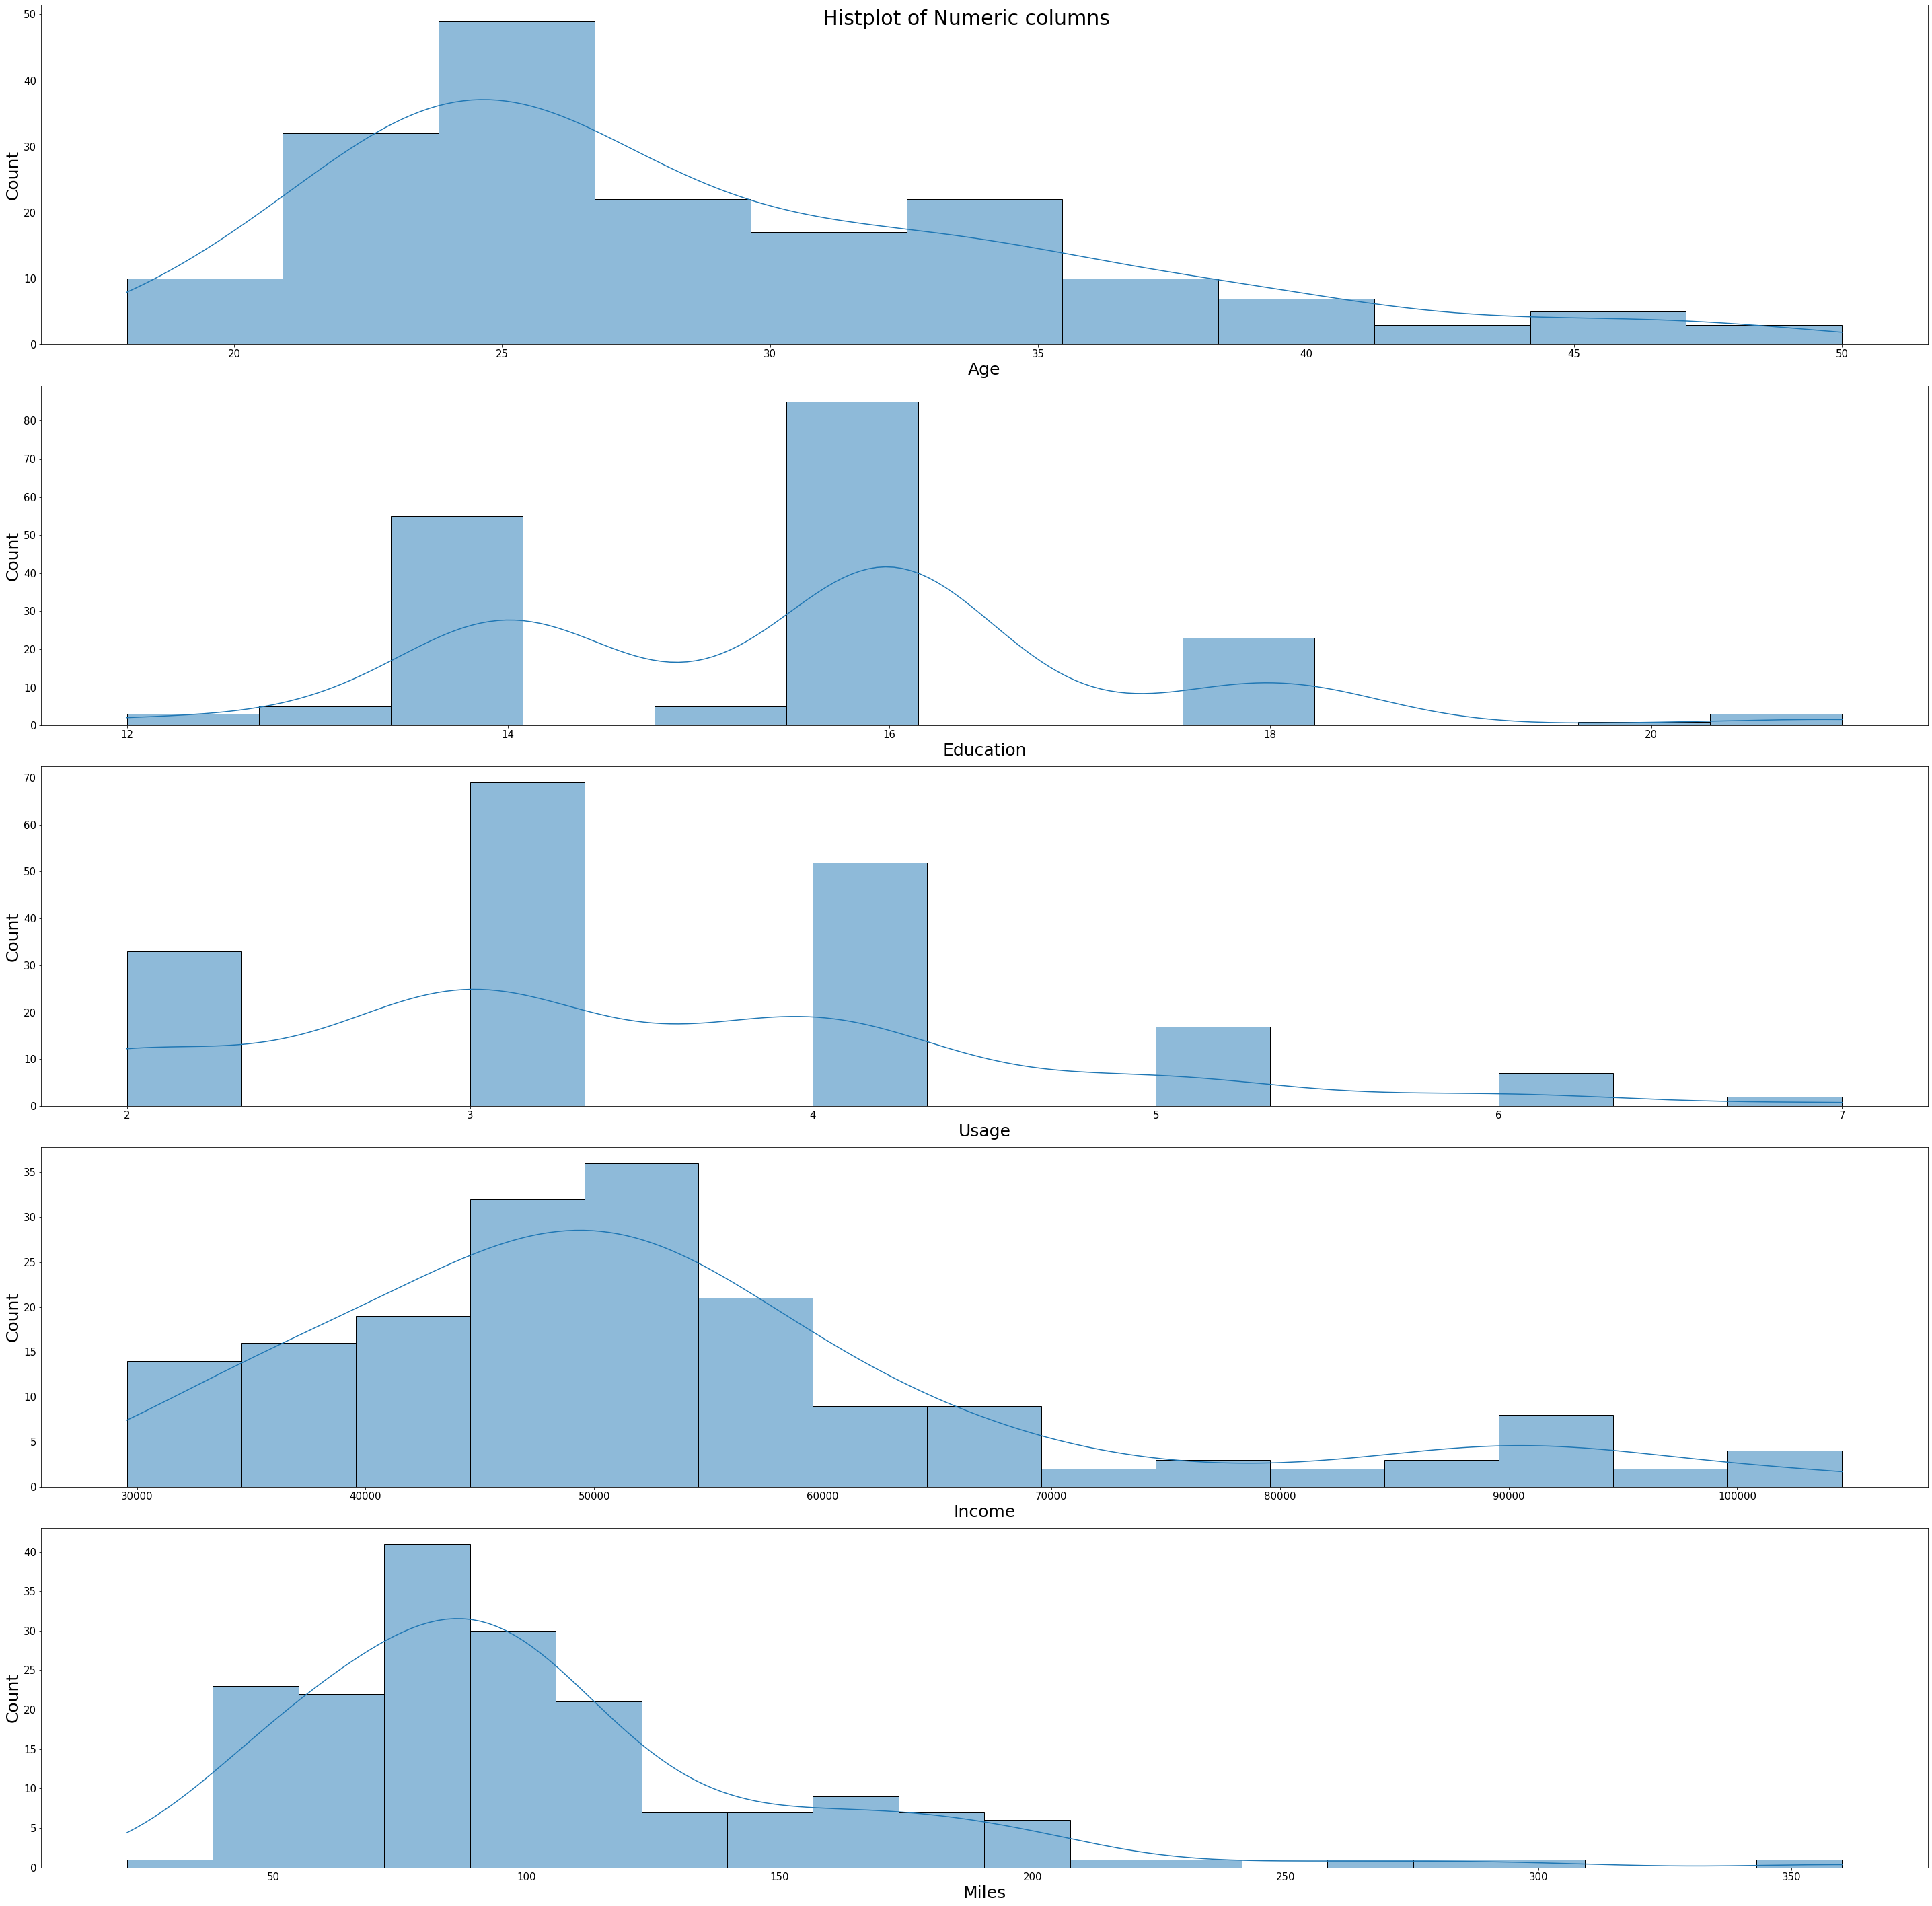

In [11]:
num_columns = len(aerofit_df.select_dtypes(include=['int']).columns) 

plt.rcParams['figure.figsize'] = (40, 40)
fig, axs = plt.subplots(num_columns, 1)

for i,col in enumerate(aerofit_df.select_dtypes(include=['int']).columns):
    sns.histplot(data=aerofit_df, x=col, kde=True, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=25)
    axs[i].set_ylabel("Count",fontsize=25)
    axs[i].tick_params(labelsize=15)

fig.suptitle('Histplot of Numeric columns', fontsize=30)
plt.tight_layout()
plt.show()

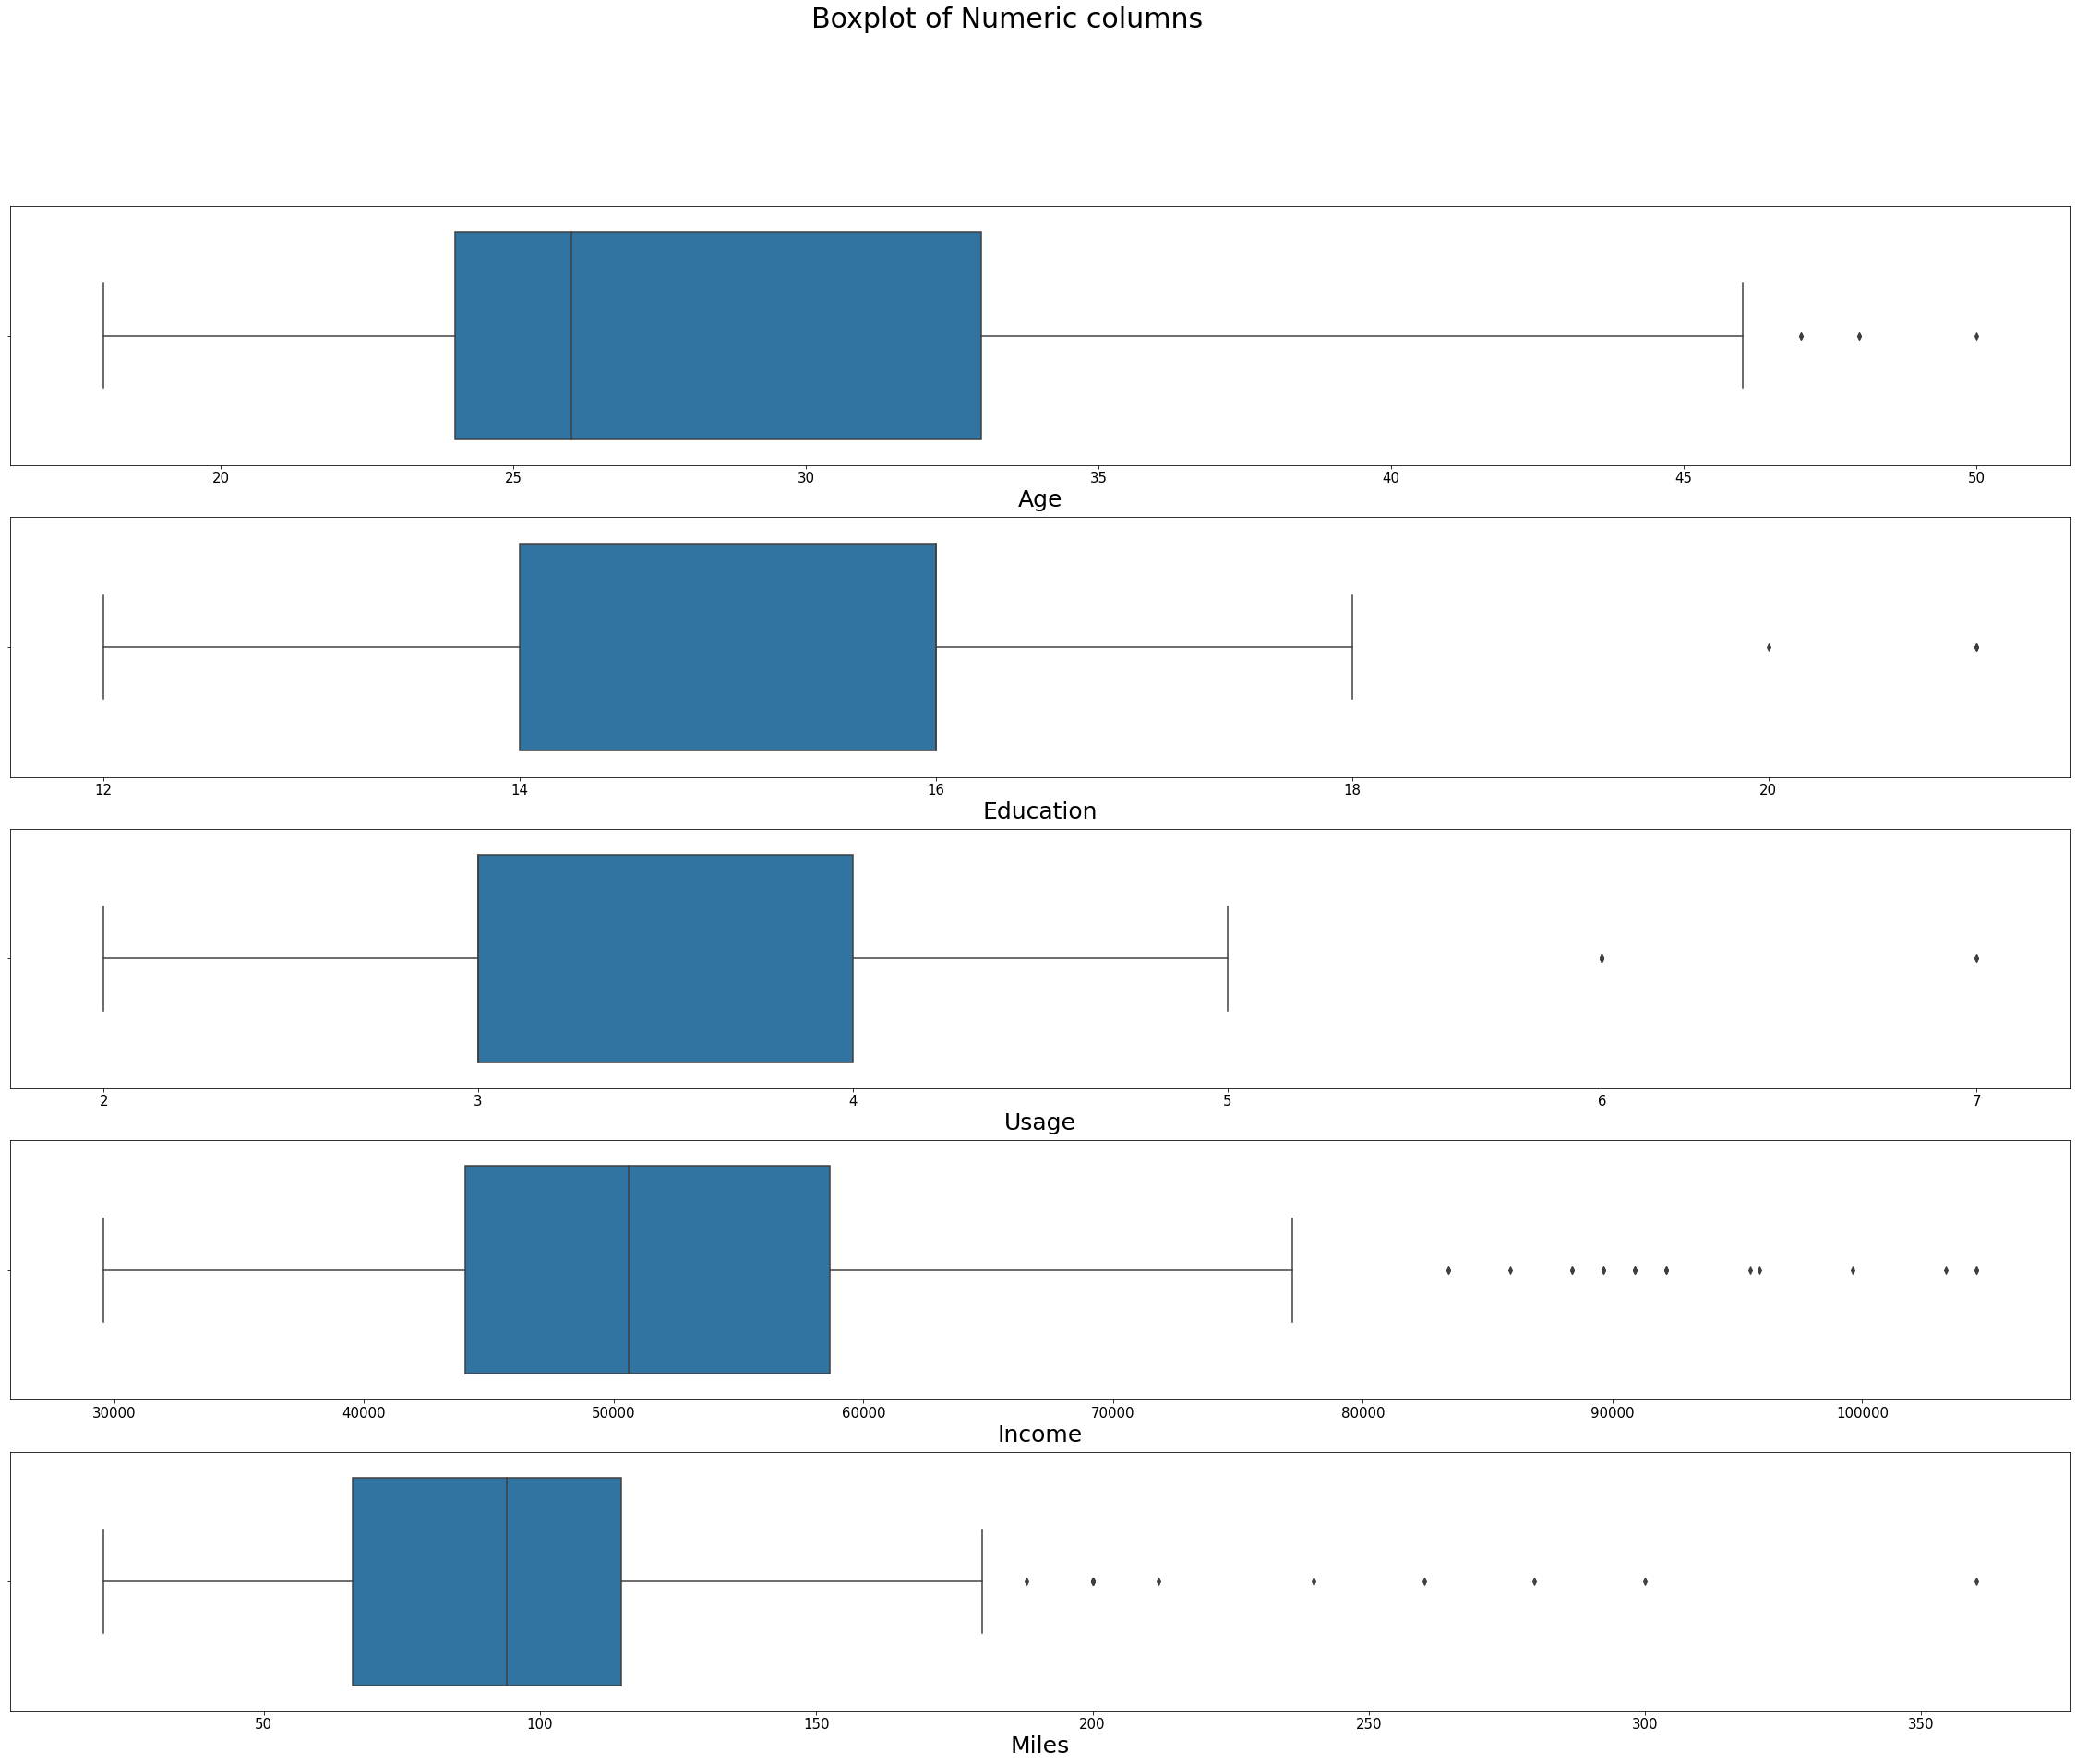

In [12]:
plt.rcParams['figure.figsize'] = (40, 30)
fig, axs = plt.subplots(num_columns, 1)
for i,col in enumerate(aerofit_df.select_dtypes(include=['int']).columns):
    sns.boxplot(data=aerofit_df, x=col, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=25)
    axs[i].tick_params(labelsize=15)

fig.suptitle('Boxplot of Numeric columns', fontsize=30)
plt.show()

#### 1. As established earlier, Income and Miles have a lot of outliers
#### 2. Education has a multimodal distribution, with majority of the respondents having 14 & 16 years of education
#### 3. Usage also has a multimodal distribution, with majority of the respondents using it for 3 or 4 times a week
#### 4. Age has a fat tail distribution, with significant portion being in the age group of 30-40

## Bivariate Analysis

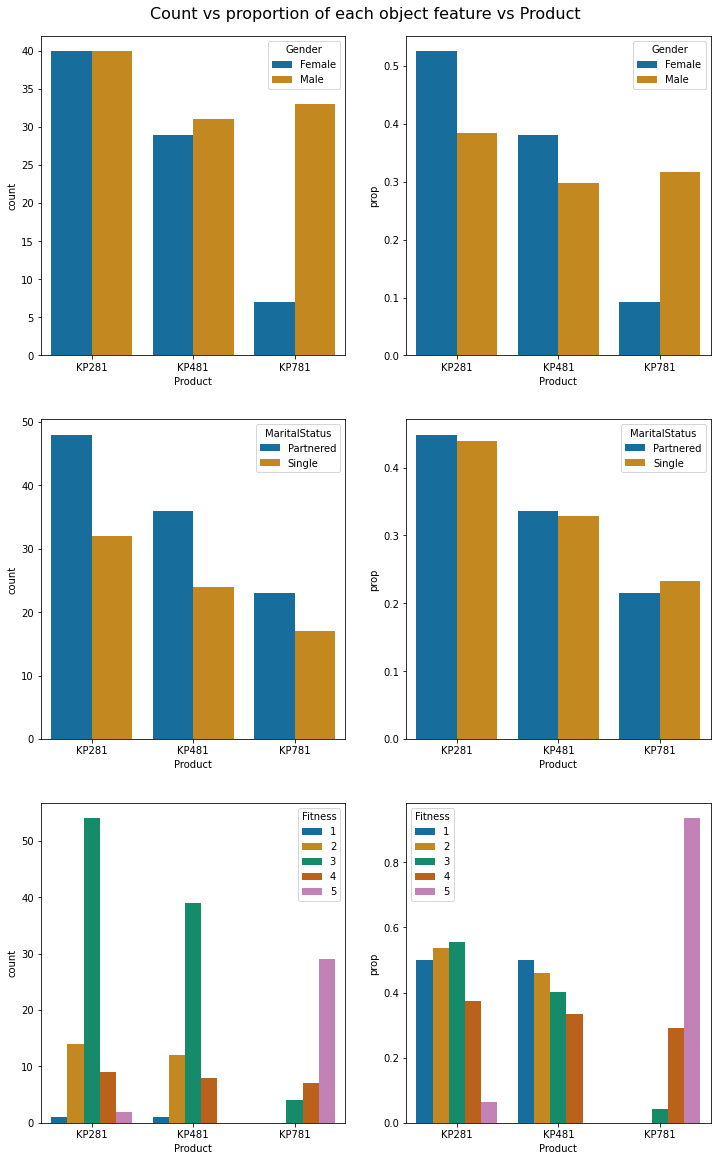

In [13]:
column_names = list(aerofit_df.select_dtypes(include=['object']).columns)
df1 = aerofit_df[column_names].copy()
ind_cat_columns = column_names.copy()
ind_cat_columns.remove('Product')


def prop_check(data):
    f, axes = plt.subplots(3,2,figsize= (12,20))
    plt.suptitle('Count vs proportion of each object feature vs Product', size =16, y = 0.9)
    r = 0
    for i in ind_cat_columns:       
        data_prop = (data['Product'].groupby(data[i]).value_counts(normalize = True).rename('prop').reset_index())
        sns.countplot(data = data, x ='Product', hue = i, ax = axes[r,0], hue_order=data_prop[i].unique(), palette=current_palette)
        sns.barplot(data = data_prop, x = 'Product', y = 'prop',hue = i,ax = axes[r,1],palette=current_palette)
        r = r+1
prop_check(df1)

#### 1. While males mostly purchased all three varieties of Treadmills, Females mostly purchased KP281 and KP481. Less than 10% of females purchased KP781
#### 2. As seen in the proportion graph, the purchase of a treadmill is NOT driven by marital status of respondents.
#### 3. More than 90% of the respondents who rated themshelves 5 on fitness level preferred KP781 variant of the treadmill. Respondents who rated themshelves less than 3 preferred KP281 and KP481

In [14]:
sns.pairplot(aerofit_df, vars = num_features, dropna = True, hue = 'Product')

NameError: name 'num_features' is not defined

In [ ]:
num_features = list(aerofit_df.select_dtypes(include=['int']).columns)
plt.rcParams['figure.figsize'] = (40, 60)
fig, axs = plt.subplots(len(cat_cols), 1)
for i,col in enumerate(num_features):
    sns.boxplot(data=aerofit_df, x='Product',y = col, ax=axs[i])
    axs[i].set_title("Product vs {}".format(col), pad=12, fontsize=25)
    axs[i].set_xlabel(col,fontsize=25)
    axs[i].tick_params(labelsize=20)

fig.suptitle('Bivariate Analysis of Numeric columns w.r.t Product', fontsize=30)
plt.show()

#### From the pairplot and Boxplot, following conclusions can be drawn:-
#### 1. KP781 was preferred mostly by younger people (age 25-30)
#### 2. The median education level of respondents purchasing KP781 was more than the median education level of respondents purchasing KP281 and KP481
#### 3. Respondents who used treadmill more than 4 times a week preferred KP781
#### 4. Richer respondents ( income > 60000) preferred KP781
#### 5. Respondents wishing to run more than 120 miles a week preferred KP781

### Marginal and Conditional Probabilities

In [ ]:
for col in aerofit_df.select_dtypes(include=['object']).columns: #Filtering out non-numeric columns
    print("Marginal Probability for {}".format(col))
    print(round(aerofit_df[col].value_counts(normalize=True)*100,2)) #Displaying frequency distribution of categorical Variables
    print("----------------------------")

In [ ]:
def calculate_conditional_probabilities(feature):
    df = pd.crosstab(index=aerofit_df[feature], columns=[aerofit_df['Product']])
    unique_items_feature = aerofit_df[feature].unique()
    unique_items_product = aerofit_df['Product'].unique()
    
    for prd in unique_items_product:
        for feat in unique_items_feature:
            cond_p = df[prd][feat] / df.loc[feat].sum()
            print("Conditional Probability of purchasing {} given {} => P({}/{}) = {}".format(prd,feat,prd,feat,cond_p))

In [ ]:
calculate_conditional_probabilities('Gender')

In [ ]:
calculate_conditional_probabilities('MaritalStatus')

In [ ]:
calculate_conditional_probabilities('Fitness')

### Customer Profiling

In [ ]:
plt.rcParams['figure.figsize'] = (40, 60)
fig, axs = plt.subplots(num_columns, 1)
for i,col in enumerate(num_features):
    sns.boxplot(data=aerofit_df, x='Gender',y = col, hue='Product', ax=axs[i])
    axs[i].set_title("Gender vs {} for Product".format(col), pad=12, fontsize=25)
    axs[i].set_ylabel(col,fontsize=25)
    axs[i].tick_params(labelsize=20)

fig.suptitle('Multivariate Analysis of Numeric columns w.r.t Product', fontsize=30)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (40, 60)
fig, axs = plt.subplots(num_columns, 1)
for i,col in enumerate(num_features):
    sns.boxplot(data=aerofit_df, x='MaritalStatus',y = col, hue='Product', ax=axs[i])
    axs[i].set_title("MaritalStatus vs {} for Product".format(col), pad=12, fontsize=25)
    axs[i].set_ylabel(col,fontsize=25)
    axs[i].tick_params(labelsize=20)

fig.suptitle('Multivariate Analysis of Numeric columns w.r.t Product', fontsize=30)
plt.show()

### KP281 ####
#### Single Customers in the age range 22-33 & Partnered Customers in the age range 22-35
#### 14-16 years of education
#### Usage of Less than 4 times a week
#### Less than 120 miles a week for Singles, less than 100 miles a week for Partnered
#### Preferred by people in the income range 35k - 53k

### KP481 ####
#### Single Customers in the age range 22-30 & Partnered Customers in the age range 22-35
#### 14-16 years of education
#### Usage of 2-3 times a week. Females who use it for 4 times a week, alos prefer this variant
####  Less than 100 miles a week for Partnered & Single
#### Preferred by people in the income range 45k - 50k

### KP781 ####
#### preferred mostly by younger people (age 25-30)
#### More than 16 years of education
#### Usage of more than 4 times a week. 
####  More than 150 miles a week for Females and Partnered
#### Preferred by people in the income > 60k

### Recommendations

#### 1. KP781 is a premium product, has a niche audience and will be preferred by hardcore fitness ethusiasts. No need to advertise much
#### 2. KP281 and KP481 have quite similiar consumer profile. Inorder to increase monetary value from treadmill sales, the company should launch a product that has features of both and discontinue KP281